In [4]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import dotenv
from os import environ

#### Parametros para conexion a base de datos

In [5]:
env_file = '../.env'
dotenv.load_dotenv(env_file, override=True)

# Definir parametros de la conexion a la base de datos
dbname = 'bike_sharing_db'
user = 'postgres'
password = environ.get('PAOLA_PSSWD')
host = 'localhost'
port = '5432' # puerto por defecto de postgres

print(password)

palestor


#### Establecer conexion con base de datos para crear la tabla

In [6]:
# Establecer la conexion con psycopg2 (Solo se necesita para crear la tabla)
conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)
cur = conn.cursor()

# Crear la tabla para el dataset
create_table_query = '''
CREATE TABLE IF NOT EXISTS bike_sharing (
    datetime TIMESTAMP,
    season INT,
    holiday INT,
    workingday INT,
    weather INT,
    temp FLOAT,
    atemp FLOAT,
    humidity INT,
    windspeed FLOAT,
    casual INT,
    registered INT,
    "count" INT
);
'''

cur.execute(create_table_query)
conn.commit()

# Cerrar la conexion
cur.close()
conn.close()

#### Inicializar motor y cargar datos en la tabla creada

In [7]:
# Inicializar el motor par aSQLAlchemy
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{dbname}')

# Cargar la data a RAM
bsd_train_path = '../../data/data_small/bike-sharing-demand/train.csv'
df = pd.read_csv(bsd_train_path)  
df['datetime'] = pd.to_datetime(df['datetime'])  

# Insertar la data desde RAM a la tabla creada
df.to_sql('bike_sharing', engine, if_exists='replace', index=False)
print(f'Data cargada en PostgreSQL')

Data cargada en PostgreSQL


### Hacer queries

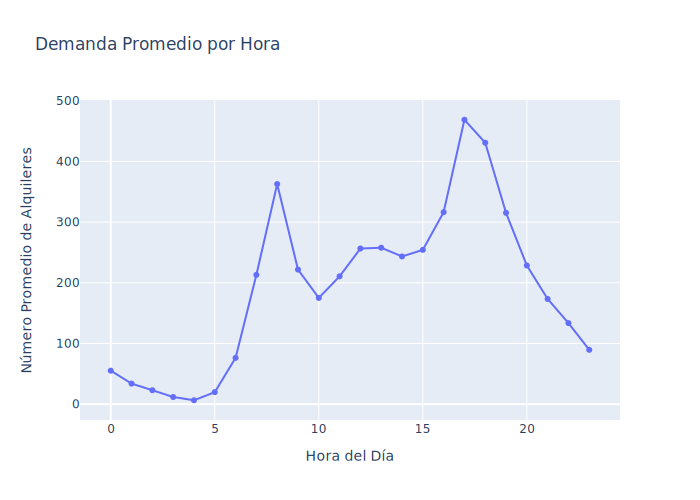

In [8]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

# Query 1: Demanda promedio por hora en SQL
query1 = '''
SELECT EXTRACT(HOUR FROM datetime) AS hour, AVG("count") AS avg_count
FROM bike_sharing
GROUP BY hour
ORDER BY hour;
'''
df_query1 = pd.read_sql(query1, engine)  
# print(f"Demanda promedio por hora:\n{df_query1}")

fig = px.line(df_query1, x='hour', y='avg_count',
              title='Demanda Promedio por Hora',
              labels={'hour': 'Hora del Día', 'avg_count': 'Número Promedio de Alquileres'},
              markers=True)
fig.show()

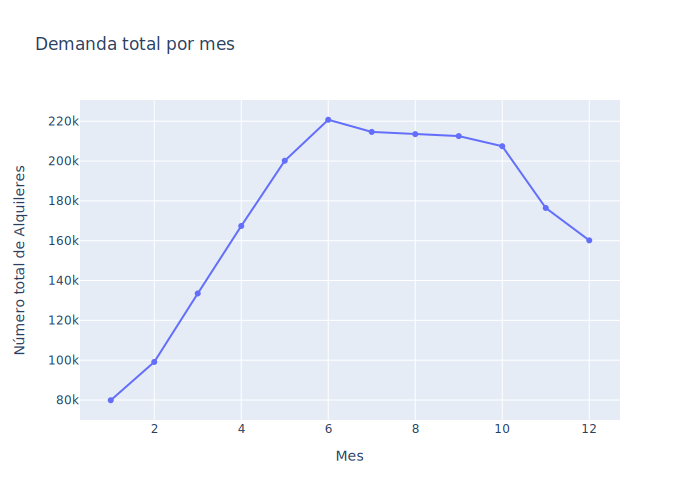

In [9]:
# Query 2: Demanda total por mes en SQL
query2 = '''
SELECT EXTRACT(MONTH FROM datetime) AS month, SUM("count") AS total_count
FROM bike_sharing
GROUP BY month
ORDER BY month;
'''
df_query2 = pd.read_sql(query2, engine)  
# print(f"Demanda total por mes:\n{df_query2}")

fig = px.line(df_query2, x='month', y='total_count',
              title='Demanda total por mes',
              labels={'month': 'Mes', 'total_count': 'Número total de Alquileres'},
              markers=True)
fig.show()

In [10]:
# Query 3: Correlacion entre temperatura y demanda en SQL
query3 = '''
SELECT CORR(temp, "count") AS temp_demand_correlation
FROM bike_sharing;
'''
df_query3 = pd.read_sql(query3, engine)  
print("\nCorrelacion entre temperatura y demanda:")
print(df_query3)


Correlacion entre temperatura y demanda:
   temp_demand_correlation
0                 0.394454
